In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [5]:
data0 = train_df.copy()

In [6]:
data0.drop(labels='Name',axis=1,inplace=True) #把Name列删除

In [7]:
data0.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
from sklearn import preprocessing

In [10]:
# 性别属性列由字符列改为数值列
f_names = ['Sex']
for x in f_names:
    label = preprocessing.LabelEncoder()
    data0[x] = label.fit_transform(data0[x])

In [12]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 73.2+ KB


In [16]:
cate_cols = []
num_cols =[]
dtypes = data0.dtypes

for col, dtype in dtypes.items():
    if dtype == 'object':
        cate_cols.append(col)
    else:
        num_cols.append(col)

In [17]:
print(cate_cols)
print(num_cols)

['Ticket', 'Cabin', 'Embarked']
['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


In [18]:
data0.drop(labels='Ticket',axis=1,inplace=True) #把Ticket列删除

In [20]:
data0.drop(labels='Cabin',axis=1,inplace=True) #Cabin

In [21]:
data0.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [22]:
# Embarked属性列由字符列改为数值列
f_names = ['Embarked']
for x in f_names:
    label = preprocessing.LabelEncoder()
    data0[x] = label.fit_transform(data0[x])

In [24]:
data0.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
5,6,0,3,1,NaN,0,0,8.4583,1
6,7,0,1,1,54.0,0,0,51.8625,2
7,8,0,3,1,2.0,3,1,21.0750,2
8,9,1,3,0,27.0,0,2,11.1333,2
9,10,1,2,0,14.0,1,0,30.0708,0


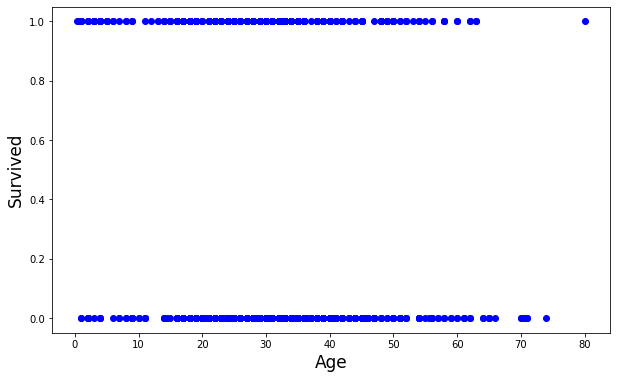

In [28]:
#直观显示关联
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.scatter(x=data0['Age'], y=data0['Survived'],color='b')
plt.xlabel('Age',fontsize=17)
plt.ylabel('Survived',fontsize=17)
plt.show()

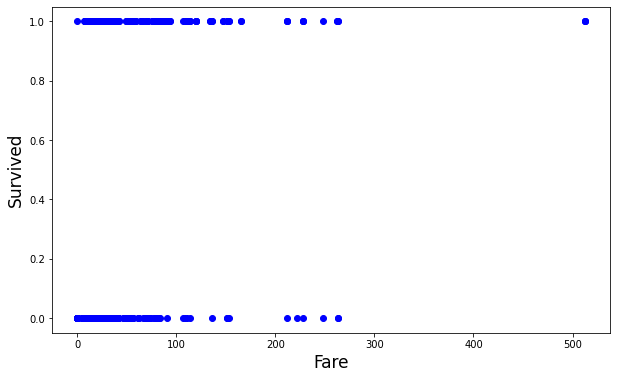

In [30]:
plt.figure(figsize=(10,6))

plt.scatter(x=data0['Fare'], y=data0['Survived'],color='b')
plt.xlabel('Fare',fontsize=17)
plt.ylabel('Survived',fontsize=17)
plt.show()

In [31]:
data0.isnull().sum() #年龄这一类有177个NAN

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [32]:
# 计算年龄的均值
data0['Age'].mean()

29.69911764705882

In [33]:
# 空缺值处理
data0['Age'].fillna(29.5,inplace=True)

In [35]:
data0['Age'].mean()

29.659562289562288

In [36]:
data0.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [38]:
import seaborn as sns

In [39]:
train_y = data0['Survived']
train_x = data0.drop('Survived',axis=1)

In [40]:
data1 = test_df.copy()

In [42]:
data1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
data0.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [49]:
print(train_x.shape)
print(train_y.shape)
print(data1.shape)

(891, 8)
(891,)
(418, 8)


In [47]:
#data1.drop(labels='Name',axis=1,inplace=True) #Name
data1.drop(labels='Cabin',axis=1,inplace=True) #Cabin
data1.drop(labels='Ticket',axis=1,inplace=True) #Ticket

In [48]:
data1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [50]:
# Embarked属性列由字符列改为数值列
f_names = ['Sex','Embarked']
for x in f_names:
    label = preprocessing.LabelEncoder()
    data1[x] = label.fit_transform(data1[x])

In [51]:
data1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [52]:
data1.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [53]:
data1['Age'].mean()

30.272590361445783

In [54]:
# 空缺值处理
data1['Age'].fillna(30,inplace=True)

In [55]:
data1['Age'].mean()

30.216507177033492

In [60]:
data = pd.concat([train_x,data1],axis=0,ignore_index=True)
print(data.shape)
data.tail()

(1309, 8)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1304,1305,3,1,30.0,0,0,8.0500,2
1305,1306,1,0,39.0,0,0,108.9000,0
1306,1307,3,1,38.5,0,0,7.2500,2
1307,1308,3,1,30.0,0,0,8.0500,2
1308,1309,3,1,30.0,1,1,22.3583,0


In [61]:
count = data.isnull().sum().sort_values(ascending=False) #把非空元素选出并降序排列
ratio = count/len(data)
nulldata = pd.concat([count,ratio],axis=1,keys=['count','ratio'])
nulldata[nulldata.ratio > 0]

,count,ratio
Fare,1,0.000764


In [62]:
print(data1.shape)
print(data.shape)

(418, 8)
(1309, 8)


In [63]:
n_train = data0.shape[0]
train_features = data[:n_train]
test_features = data[n_train:]
train_labels = train_y
print(train_features.shape)
print(test_features.shape)

(891, 8)
(418, 8)


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# 划分数据集
train_data, test_data, train_label, test_label = train_test_split(train_features, train_labels,test_size = 0.25)

In [66]:
print(train_data.shape)
print(test_data.shape)

(668, 8)
(223, 8)


In [74]:
import numpy as np
import torch
import torch.optim as optim
from torch import nn

In [69]:
train_labels1 = np.expm1(train_labels)
train_features1 = torch.tensor(data[:n_train].values,dtype = torch.float32)
test_features1 = torch.tensor(data[n_train:].values,dtype = torch.float32)
train_labels1 = torch.tensor(train_labels1.values.reshape(-1,1),dtype=torch.float32)

In [76]:
loss = nn.MSELoss()
in_features = train_features1.shape[1]
print(in_features)

8


In [84]:
def get_net():
    net = nn.Sequential(
                        nn.Linear(in_features,8),
                        nn.ReLU(),nn.Linear(8,4),
                        nn.ReLU(),nn.Linear(4,1))
    return net

In [85]:
from d2l import torch as d2l

In [91]:
def log_rmse(net,features,labels):
    clam = torch.clamp(net(features),1,float('inf'))
    rmse = torch.sqrt(loss(clam,labels))
    
    return rmse.item()

In [89]:
def train(net,train_features,train_labels,test_features,test_labels,
               num_epochs,learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    
    optimizer = optim.Adam(net.parameters(), lr=lr, eps=1e-08,weight_decay=weight_decay)
    
    for epoch in range(num_epochs):
        for X,y in train_iter:
            optimizer.zero_grad()
            l = loss(net(X),y)
            l.backward()
            optimizer.step()
            
        train_ls.append(log_rmse(net,train_features, train_labels))
        
        if test_labels is not None:
            test_ls.append(log_rmse(net,test_features, test_labels))
    
    return train_ls, test_ls

In [82]:
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):

        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid

def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i==0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        print(f'fold {i + 1}, train rmse {float(train_ls[-1]):f}, '
              f'valid rmse {float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k

fold 1, train log rmse 0.862804, valid log rmse 0.923977
fold 2, train log rmse 0.882233, valid log rmse 0.867245
fold 3, train log rmse 0.863612, valid log rmse 0.869908
fold 4, train log rmse 0.876122, valid log rmse 0.871800
fold 5, train log rmse 0.858443, valid log rmse 0.898044


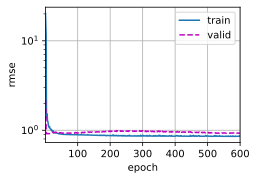

In [95]:
k, num_epochs, lr, weight_decay, batch_size = 5, 600,0.001, 0.001, 32

train_l, vali_l = k_fold(k,train_features1,train_labels1,num_epochs,lr,
                        weight_decay,batch_size)

In [96]:
sub_data = pd.read_csv('gender_submission.csv')

In [101]:
sub_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [104]:
def train_and_pred(train_features, test_feature, train_labels, sub_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='rmse', xlim=[1, num_epochs], yscale='log')
    print(f'train rmse {float(train_ls[-1]):f}')
    # 将网络应用于测试集。
    preds = net(test_feature).detach().numpy()
    preds = pd.Series(preds.reshape(1,-1)[0])
    # 将其重新格式化以导出到Kaggle
    sub_data['Survived'] = pd.Series(preds.values.reshape(1, -1)[0])
    submission = sub_data
    submission.to_csv('submission.csv', index=False)
    return preds

train rmse 0.864856


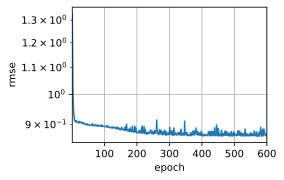

In [105]:
preds = train_and_pred(train_features1,test_features1,train_labels1,sub_data,
                      num_epochs,lr,weight_decay,batch_size)

In [106]:
sub_data['Survived'] = preds
submission = sub_data
submission.to_csv('submission.csv',index=False)

In [110]:
len(submission['Survived'])

418

In [112]:
submission['Survived'][1]

0.41906613

In [114]:
submission['Survived'] = [1 if x > 0.5 else 0 for x in submission['Survived'] ]

In [117]:
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [118]:
submission.to_csv('submission.csv',index=False)